## Модули

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from collections import Counter
from itertools import cycle
import seaborn as sns
import numpy as np
import time
import warnings
warnings.simplefilter("ignore")

# Методичка

## Загрузка датасета

In [ ]:
# Обучающая выборка
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
# Тестовая выборка
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

## Исследование данных

In [ ]:
print(newsgroups_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [ ]:
print("Группа:", newsgroups_train.target[0])
print("Данные:", newsgroups_train.data[0])

Группа: 7
Данные: I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


Описательный анализ. Выборка train target
Массив: [7 4 4 ... 3 1 8]
Размер: 11314
Минимум: 0
Максимум: 19
Средняя: 9.29299982322786
Медиана: 9.0
Диапазон: 19
Дисперсия: 30.941108855046814
Стандартное отклонение = 5.562473267805142


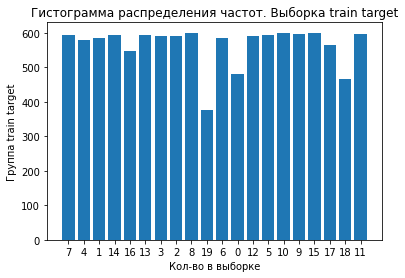

In [ ]:
arr = newsgroups_train.target
size = len(arr)
mean = np.mean(arr)
median = np.median(arr)
min = np.amin(arr)
max = np.amax(arr)
rng = np.ptp(arr)
var = np.var(arr)
std = np.std(arr)

print("Описательный анализ. Выборка train target")
print("Массив:", arr)
print("Размер:", size)
print("Минимум:", min)
print("Максимум:", max)
print("Средняя:", mean)
print("Медиана:", median)
print("Диапазон:", rng)
print("Дисперсия:", var)
print("Стандартное отклонение =", std)

counter = Counter(arr)
groups, counts = list(counter.keys()), list(counter.values())
indexes = range(len(groups))
plt.bar(indexes, counts, align="center")
plt.xticks(indexes, groups)
plt.title("Гистограмма распределения частот. Выборка train target")
plt.ylabel("Группа train target")
plt.xlabel("Кол-во в выборке")
plt.show()

## Векторизация текста

In [ ]:
vectorizer = CountVectorizer()
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

## Модели классификауции

In [ ]:
def process(cls):
  sizes = [100, 500, 1000, 5000, 10000]
  Ts, As, Ps, Rs, Fs = [], [], [], [], []
  for S in sizes:
    start = time.time()
    cls.fit(vectors_train[:S], newsgroups_train.target[:S])
    end = time.time()
    T = round(end - start, 2)
    pred = cls.predict(vectors_test)
    A = metrics.accuracy_score(newsgroups_test.target, pred)
    P = metrics.precision_score(newsgroups_test.target, pred, average="macro")
    R = metrics.recall_score(newsgroups_test.target, pred, average="macro")
    F =  metrics.f1_score(newsgroups_test.target, pred, average="macro")
    print("Размер выборки:", S, "элементов")
    print("Время обучения:", T, "секунд")
    print("Accuracy метрика:", A)
    print("Precision метрика:", P)
    print("Recall метрика:", R)
    print("F1 метрика:", F)
    print()
    Ts.append(T)
    As.append(A)
    Ps.append(P)
    Rs.append(R)
    Fs.append(F)

  plt.plot(sizes, Ts, label="Время обучения")
  plt.title("Кривая обучения. Для всех размеров выборки")
  plt.ylabel("Полученные значения")
  plt.xlabel("Размер выборки")
  plt.legend()
  plt.show()

  plt.plot(sizes, As, label="Accuracy метрика")
  plt.plot(sizes, Ps, label="Precision метрика")
  plt.plot(sizes, Rs, label="Recall метрика")
  plt.plot(sizes, Fs, label="F1 метрика")
  plt.title("Кривая обучения. Для всех размеров выборки")
  plt.ylabel("Полученные значения")
  plt.xlabel("Размер выборки")
  plt.legend()
  plt.show()

  sns.heatmap(metrics.confusion_matrix(newsgroups_test.target, pred), annot=True)
  plt.title("Матрица ошибок. Размер выборки 10000")
  plt.ylabel("Действительные значения")
  plt.xlabel("Предсказанные значения")
  plt.show()

### Логистическая регрессия (LogisticRegression)

Размер выборки: 100 элементов
Время обучения: 38.84 секунд
Accuracy метрика: 0.10621348911311737
Precision метрика: 0.18973145619991633
Recall метрика: 0.10410648140804454
F1 метрика: 0.08924941025543491

Размер выборки: 500 элементов
Время обучения: 39.85 секунд
Accuracy метрика: 0.2425650557620818
Precision метрика: 0.26643502518369583
Recall метрика: 0.23570680325763385
F1 метрика: 0.2308494549103206

Размер выборки: 1000 элементов
Время обучения: 46.93 секунд
Accuracy метрика: 0.3313860860329262
Precision метрика: 0.33484855838634625
Recall метрика: 0.3222221218407902
F1 метрика: 0.3197110999411465

Размер выборки: 5000 элементов
Время обучения: 45.67 секунд
Accuracy метрика: 0.534784917684546
Precision метрика: 0.533656030349613
Recall метрика: 0.523813308260684
F1 метрика: 0.5246057118595661

Размер выборки: 10000 элементов
Время обучения: 49.2 секунд
Accuracy метрика: 0.6014338821030271
Precision метрика: 0.597586347044091
Recall метрика: 0.5899453524414942
F1 метрика: 0.5902185

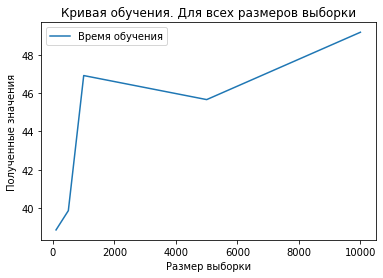

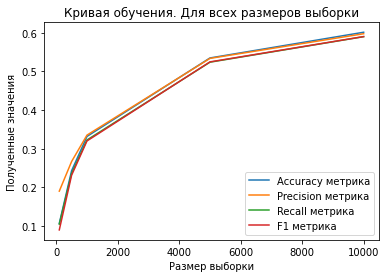

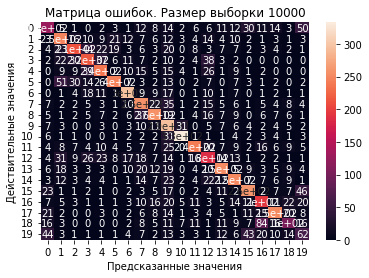

In [ ]:
process(cls = LogisticRegression())

### Метод опорных векторов с линейным ядром (SVC)

Размер выборки: 100 элементов
Время обучения: 0.03 секунд
Accuracy метрика: 0.09386617100371747
Precision метрика: 0.19734917375443467
Recall метрика: 0.09297358178917556
F1 метрика: 0.07751912921875245

Размер выборки: 500 элементов
Время обучения: 0.31 секунд
Accuracy метрика: 0.14723844928305896
Precision метрика: 0.17581710166787995
Recall метрика: 0.14453730707821638
F1 метрика: 0.14081039083262473

Размер выборки: 1000 элементов
Время обучения: 1.14 секунд
Accuracy метрика: 0.18852894317578334
Precision метрика: 0.21788762478954665
Recall метрика: 0.18520747404429144
F1 метрика: 0.182795406618042

Размер выборки: 5000 элементов
Время обучения: 16.0 секунд
Accuracy метрика: 0.3672331386086033
Precision метрика: 0.3950283299152616
Recall метрика: 0.3590524242101238
F1 метрика: 0.3600209218170143

Размер выборки: 10000 элементов
Время обучения: 46.14 секунд
Accuracy метрика: 0.4320233669676049
Precision метрика: 0.4551721262920491
Recall метрика: 0.42381899989150373
F1 метрика: 0.42

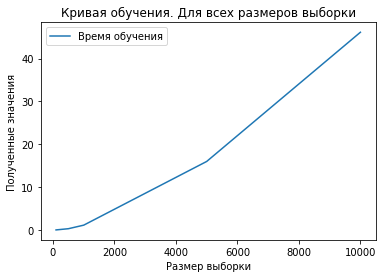

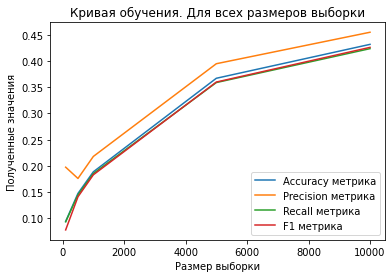

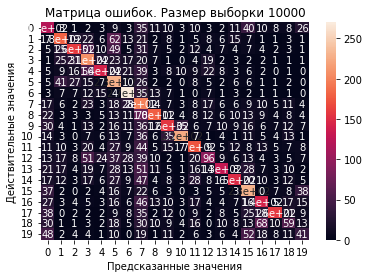

In [ ]:
process(cls = SVC(kernel='linear'))

### Метод опорных векторов с гауссовым ядром (SVC)

Размер выборки: 100 элементов
Время обучения: 0.03 секунд
Accuracy метрика: 0.052177376526818905
Precision метрика: 0.020288809061534872
Recall метрика: 0.050062451638363946
F1 метрика: 0.007680664705923969

Размер выборки: 500 элементов
Время обучения: 0.33 секунд
Accuracy метрика: 0.05469994689325544
Precision метрика: 0.01452285970884939
Recall метрика: 0.053384751233257734
F1 метрика: 0.010383854101683533

Размер выборки: 1000 элементов
Время обучения: 1.31 секунд
Accuracy метрика: 0.06611789697291556
Precision метрика: 0.04942526960272105
Recall метрика: 0.06437875308834694
F1 метрика: 0.022152855810613666

Размер выборки: 5000 элементов
Время обучения: 32.2 секунд
Accuracy метрика: 0.06731279872543813
Precision метрика: 0.15640476305872522
Recall метрика: 0.06397245848426322
F1 метрика: 0.02666421595640337

Размер выборки: 10000 элементов
Время обучения: 126.05 секунд
Accuracy метрика: 0.08390865639936272
Precision метрика: 0.3386439605034669
Recall метрика: 0.0802120884091797
F1

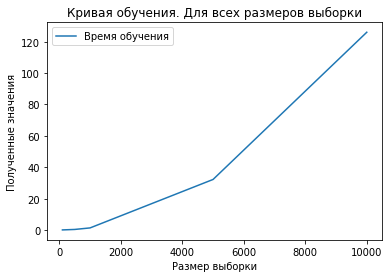

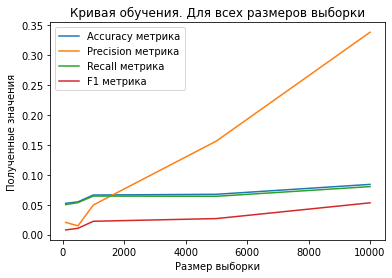

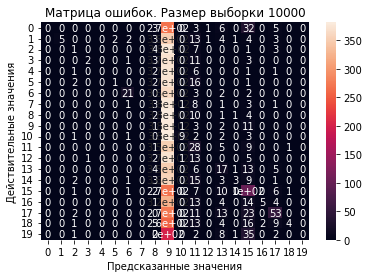

In [ ]:
process(cls = SVC(kernel='rbf'))

### Метод k ближайших соседей (KNeighborsClassifier)

Размер выборки: 100 элементов
Время обучения: 0.0 секунд
Accuracy метрика: 0.06678173127987254
Precision метрика: 0.11674743739962463
Recall метрика: 0.066358603369721
F1 метрика: 0.04271346995551904

Размер выборки: 500 элементов
Время обучения: 0.0 секунд
Accuracy метрика: 0.07740308019118428
Precision метрика: 0.09228915641464898
Recall метрика: 0.07691974217276061
F1 метрика: 0.06706284883419339

Размер выборки: 1000 элементов
Время обучения: 0.01 секунд
Accuracy метрика: 0.09904407859798195
Precision метрика: 0.13381843915986413
Recall метрика: 0.09845238803059816
F1 метрика: 0.09293966333306201

Размер выборки: 5000 элементов
Время обучения: 0.01 секунд
Accuracy метрика: 0.13436006372809348
Precision метрика: 0.15271443676747531
Recall метрика: 0.1331199501485711
F1 метрика: 0.13120865154335565

Размер выборки: 10000 элементов
Время обучения: 0.02 секунд
Accuracy метрика: 0.1571959638874137
Precision метрика: 0.17501808977954642
Recall метрика: 0.15563265757442213
F1 метрика: 0.1

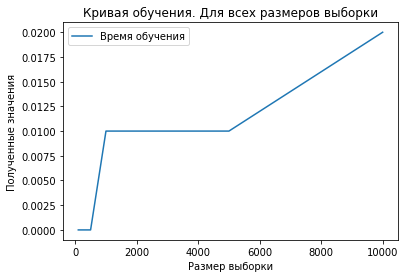

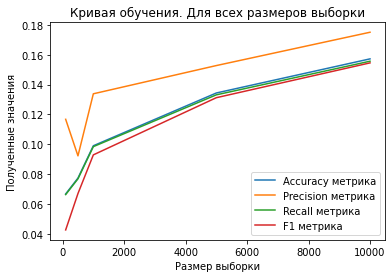

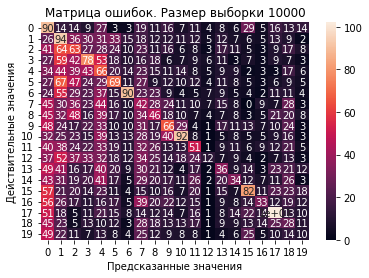

In [ ]:
process(cls = KNeighborsClassifier())

### Многослойный перцептрон (MLPClassifier)

Размер выборки: 100 элементов
Время обучения: 61.59 секунд
Accuracy метрика: 0.10223048327137546
Precision метрика: 0.2793819937309988
Recall метрика: 0.09890486206958181
F1 метрика: 0.08251122042569467

Размер выборки: 500 элементов
Время обучения: 216.1 секунд
Accuracy метрика: 0.27708443972384494
Precision метрика: 0.4834384567970095
Recall метрика: 0.27005429818822085
F1 метрика: 0.2478492079548643

Размер выборки: 1000 элементов
Время обучения: 309.08 секунд
Accuracy метрика: 0.411311736590547
Precision метрика: 0.5053965540023457
Recall метрика: 0.400593490058894
F1 метрика: 0.394855382442531

Размер выборки: 5000 элементов
Время обучения: 270.74 секунд
Accuracy метрика: 0.6180297397769516
Precision метрика: 0.6307985514049645
Recall метрика: 0.6070073880559395
F1 метрика: 0.6118357510702458

Размер выборки: 10000 элементов
Время обучения: 3.27 секунд
Accuracy метрика: 0.22703133297928837
Precision метрика: 0.477812175854993
Recall метрика: 0.2207994887827142
F1 метрика: 0.201257

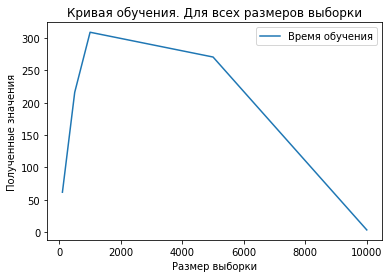

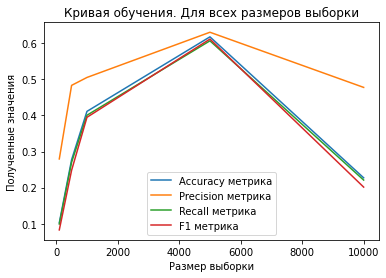

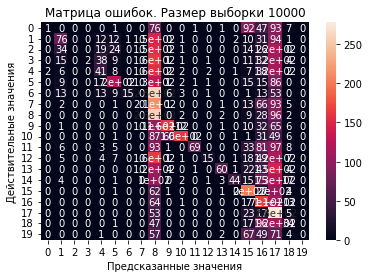

In [ ]:
process(cls = MLPClassifier()) # Остановлен принудительно, иначе ждать часами и колаб вылетит

### Логистическая регрессия (LogisticRegression)

Размер выборки: 100 элементов
Время обучения: 41.14 секунд
Accuracy метрика: 0.10621348911311737
Precision метрика: 0.18973145619991633
Recall метрика: 0.10410648140804454
F1 метрика: 0.08924941025543491

Размер выборки: 500 элементов
Время обучения: 45.56 секунд
Accuracy метрика: 0.2425650557620818
Precision метрика: 0.26643502518369583
Recall метрика: 0.23570680325763385
F1 метрика: 0.2308494549103206

Размер выборки: 1000 элементов
Время обучения: 59.99 секунд
Accuracy метрика: 0.3313860860329262
Precision метрика: 0.33484855838634625
Recall метрика: 0.3222221218407902
F1 метрика: 0.3197110999411465

Размер выборки: 5000 элементов
Время обучения: 60.03 секунд
Accuracy метрика: 0.534784917684546
Precision метрика: 0.533656030349613
Recall метрика: 0.523813308260684
F1 метрика: 0.5246057118595661

Размер выборки: 10000 элементов
Время обучения: 70.04 секунд
Accuracy метрика: 0.6014338821030271
Precision метрика: 0.597586347044091
Recall метрика: 0.5899453524414942
F1 метрика: 0.590218

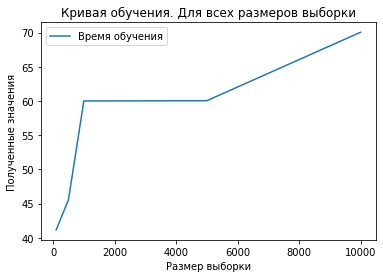

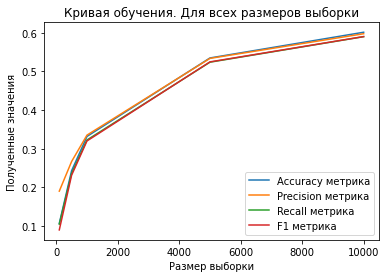

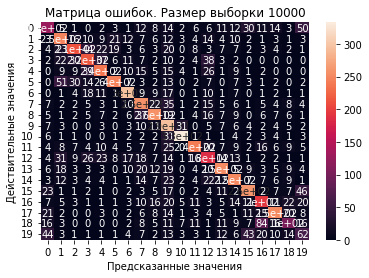

In [ ]:
process(cls = LogisticRegression())

### Классификатор дерева решений (DecisionTreeClassifier)

Размер выборки: 100 элементов
Время обучения: 0.14 секунд
Accuracy метрика: 0.1330323951141795
Precision метрика: 0.1729967012534148
Recall метрика: 0.12865793352300142
F1 метрика: 0.11676394299338781

Размер выборки: 500 элементов
Время обучения: 0.89 секунд
Accuracy метрика: 0.2665958576739246
Precision метрика: 0.2751040564575246
Recall метрика: 0.2591483136572105
F1 метрика: 0.25987021281337463

Размер выборки: 1000 элементов
Время обучения: 2.27 секунд
Accuracy метрика: 0.29806160382368563
Precision метрика: 0.29615608137133054
Recall метрика: 0.289879338691766
F1 метрика: 0.28627281625728485

Размер выборки: 5000 элементов
Время обучения: 8.33 секунд
Accuracy метрика: 0.386218799787573
Precision метрика: 0.38285208173815743
Recall метрика: 0.3776436777025739
F1 метрика: 0.3774547341412754

Размер выборки: 10000 элементов
Время обучения: 17.99 секунд
Accuracy метрика: 0.4156930430164631
Precision метрика: 0.41174088980043255
Recall метрика: 0.4068397359786927
F1 метрика: 0.4070537

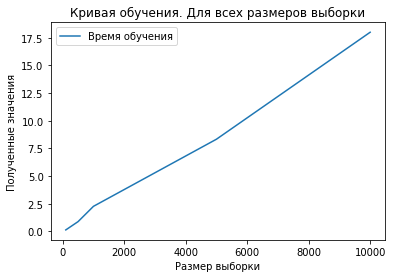

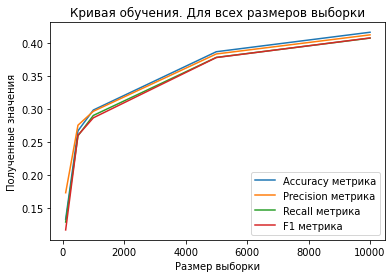

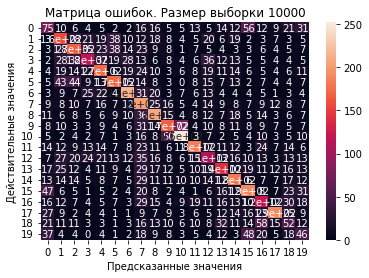

In [ ]:
process(cls = DecisionTreeClassifier())

### Классификатор случайный лес (RandomForestClassifier)

Размер выборки: 100 элементов
Время обучения: 0.19 секунд
Accuracy метрика: 0.06359532660647903
Precision метрика: 0.13821694448087554
Recall метрика: 0.061201494518374075
F1 метрика: 0.023678045540881147

Размер выборки: 500 элементов
Время обучения: 0.21 секунд
Accuracy метрика: 0.15108868826340946
Precision метрика: 0.4167498685690908
Recall метрика: 0.14556351211347276
F1 метрика: 0.11310269378246018

Размер выборки: 1000 элементов
Время обучения: 0.21 секунд
Accuracy метрика: 0.11165693043016463
Precision метрика: 0.547202670359614
Recall метрика: 0.10740597445496672
F1 метрика: 0.09197286050001514

Размер выборки: 5000 элементов
Время обучения: 0.42 секунд
Accuracy метрика: 0.30722251725969196
Precision метрика: 0.5074292826062193
Recall метрика: 0.29407801532784694
F1 метрика: 0.29213277967280304

Размер выборки: 10000 элементов
Время обучения: 0.7 секунд
Accuracy метрика: 0.3674986723313861
Precision метрика: 0.5465054305993193
Recall метрика: 0.35305369095586936
F1 метрика: 0.

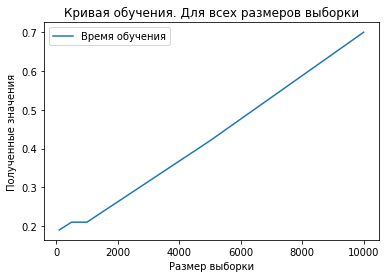

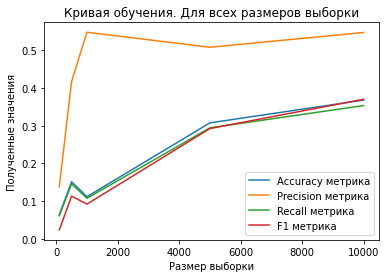

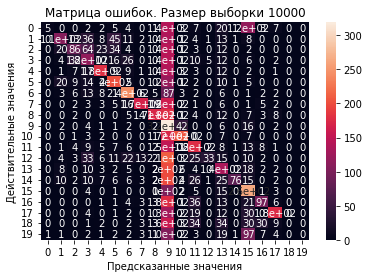

In [ ]:
process(cls = RandomForestClassifier(max_depth=2))

### Наивный байесовский метод (MultinomialNB)

Размер выборки: 100 элементов
Время обучения: 0.1 секунд
Accuracy метрика: 0.18228890069038767
Precision метрика: 0.3074740746712149
Recall метрика: 0.17841951811224727
F1 метрика: 0.1565500325752669

Размер выборки: 500 элементов
Время обучения: 0.08 секунд
Accuracy метрика: 0.40693043016463093
Precision метрика: 0.43563497918196503
Recall метрика: 0.39490365529546817
F1 метрика: 0.3740830410639945

Размер выборки: 1000 элементов
Время обучения: 0.11 секунд
Accuracy метрика: 0.4881837493361657
Precision метрика: 0.4964638681003527
Recall метрика: 0.47606808989901717
F1 метрика: 0.46485501381060823

Размер выборки: 5000 элементов
Время обучения: 0.1 секунд
Accuracy метрика: 0.6169676048858205
Precision метрика: 0.6141090565487991
Recall метрика: 0.6057015815101486
F1 метрика: 0.5943179199318414

Размер выборки: 10000 элементов
Время обучения: 0.13 секунд
Accuracy метрика: 0.6448486457780138
Precision метрика: 0.6391689801413923
Recall метрика: 0.6344615449246059
F1 метрика: 0.620531683

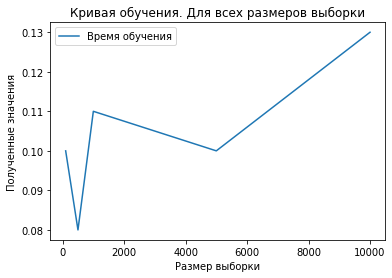

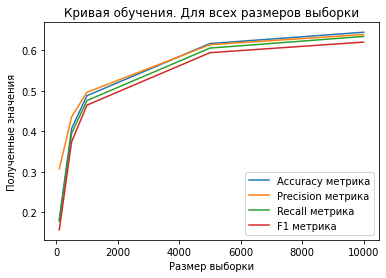

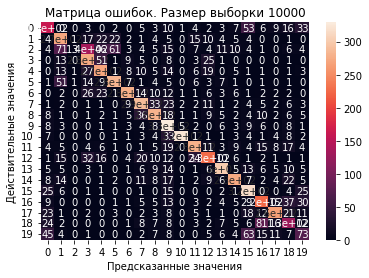

In [ ]:
process(cls = MultinomialNB(alpha=.01))

## Выводы о моделях

Наиболее хорошо себя показали модели: 
* Наивный байесовский метод (MultinomialNB)
* Логистическая регрессия (LogisticRegression)
* Многослойный перцептрон (MLPClassifier)

Самая быстрая и точная модель:
* Наивный байесовский метод (MultinomialNB)

Модель с самым долгим обучением:
* Многослойный перцептрон (MLPClassifier)